<a href="https://colab.research.google.com/github/SumitBaghel5/Maximizing-Revenue-for-Taxi-Drivers/blob/main/Hypothesis_Testing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis**

**Problem Statement**

In the fast-paced taxi booking sector,making the most of revenue is essential for long-term success and driver happiness. our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


**Objective**

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

**Research Question**


Is there a relationship between total fare amount and payemnt type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

**Importing Libraries**

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [273]:
df = pd.read_csv("/content/yellow_tripdata_2020-01 (1).csv")

In [274]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


**Exploratory Data Analysis**

In [226]:
df.shape

(6405008, 18)

In [275]:
df.dtypes

,0
VendorID,float64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [278]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [229]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_dropoff_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [230]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0.0


In [231]:
df = df [['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [232]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,0.0
1,1.0,1.0,7.00,1.20,0.0
2,1.0,1.0,6.00,0.60,0.0
3,1.0,1.0,5.50,0.80,0.0
4,1.0,2.0,3.50,0.00,0.0
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,0.0
6405004,NaN,NaN,46.67,22.13,0.0
6405005,NaN,NaN,48.85,10.51,0.0
6405006,NaN,NaN,27.17,5.49,0.0


In [233]:
df.isnull().sum()

,0
passenger_count,65441
payment_type,65441
fare_amount,0
trip_distance,0
duration,0


In [234]:
df.dropna(inplace = True)

In [235]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,0.0
1,1.0,1.0,7.0,1.20,0.0
2,1.0,1.0,6.0,0.60,0.0
3,1.0,1.0,5.5,0.80,0.0
4,1.0,2.0,3.5,0.00,0.0
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,0.0
6339563,1.0,1.0,13.0,2.13,0.0
6339564,1.0,1.0,12.5,2.55,0.0
6339565,1.0,2.0,8.5,1.61,0.0


In [236]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [237]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
167,1,2,4.5,0.60,0.0
169,1,1,6.0,1.20,0.0
178,1,1,4.5,0.60,0.0
250,1,1,10.5,2.00,0.0
271,2,1,6.5,1.40,0.0
...,...,...,...,...,...
6339562,1,1,11.0,2.10,0.0
6339563,1,1,13.0,2.13,0.0
6339564,1,1,12.5,2.55,0.0
6339565,1,2,8.5,1.61,0.0


In [238]:
df.drop_duplicates(inplace = True)

In [239]:
df['passenger_count'].value_counts(normalize = True)

,proportion
passenger_count,
1,0.388762
2,0.205883
3,0.112218
5,0.105831
6,0.081783
4,0.079212
0,0.026149
7,0.000075
8,0.000044


In [240]:
df['payment_type'].value_counts(normalize = True)

,proportion
payment_type,
1,0.566971
2,0.382117
3,0.026440
4,0.024468
5,0.000003


In [241]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] >0)&(df['passenger_count']<6)]

In [242]:
df.shape

(269500, 5)

In [243]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace = True)

In [244]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,269500.000000,269500.000000,269500.000000,269500.0
mean,2.254905,32.653422,8.737979,0.0
std,1.402785,26.980174,7.326103,0.0
min,1.000000,-500.000000,-22.180000,0.0
25%,1.000000,16.500000,3.190000,0.0
50%,2.000000,27.000000,7.010000,0.0
75%,3.000000,44.000000,12.580000,0.0
max,5.000000,4265.000000,262.880000,0.0


In [132]:
# df = df[df['fare_amount']>0]
# df = df[df['trip_distance']>0]
# df = df[df['duration']>0]


{'whiskers': [<matplotlib.lines.Line2D at 0x7c847e53d690>,
 'caps': [<matplotlib.lines.Line2D at 0x7c847e53d840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c847e53f700>],
 'medians': [<matplotlib.lines.Line2D at 0x7c847e53f8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c8483a1bbb0>],
 'means': []}

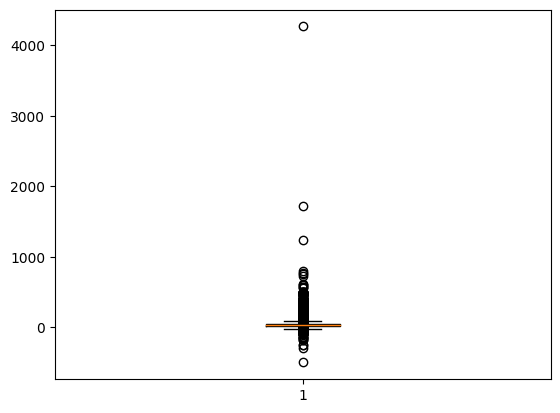

In [245]:
plt.boxplot(df['fare_amount'])

In [246]:
for col in ['fare_amount','trip_distance','duration']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1

  lower_bound = q1-1.5*IQR
  upper_bound = q3+1.5*IQR

  df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]



In [247]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.00,1.20,0.0
1,1,Card,7.00,1.20,0.0
2,1,Card,6.00,0.60,0.0
3,1,Card,5.50,0.80,0.0
4,1,Cash,3.50,0.00,0.0
...,...,...,...,...,...
6339340,1,Cash,46.50,10.13,0.0
6339354,3,Cash,11.50,3.35,0.0
6339383,1,Card,61.42,1.50,0.0
6339418,1,Cash,40.50,7.20,0.0


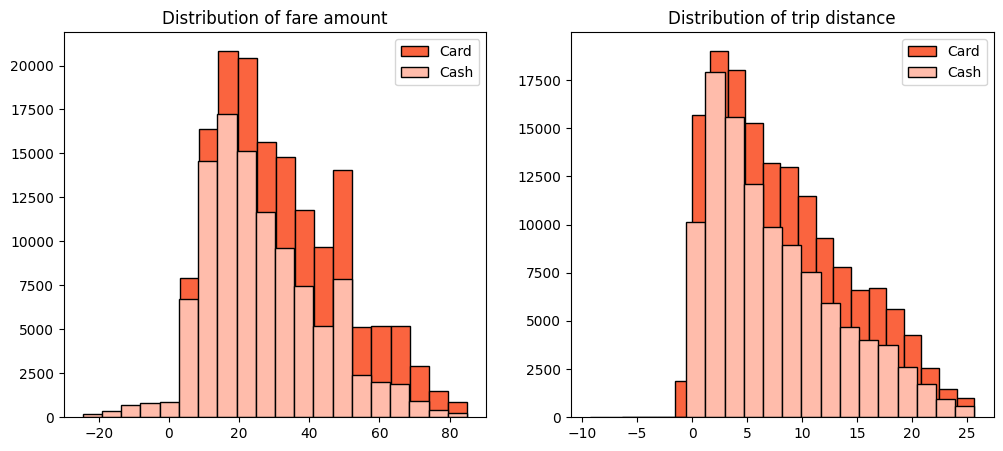

In [249]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FA643F', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype= 'barstacked', bins = 20, edgecolor = 'k', color ='#FFBCAB', label = 'Cash')
plt.legend()
plt.show()


In [250]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
Card           32.054824  17.862980      8.395542  6.034228
Cash           26.783877  16.921796      7.537998  5.787916

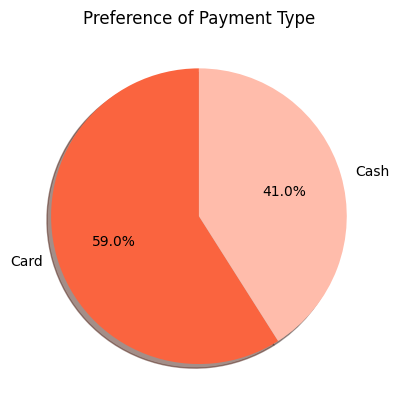

In [251]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

In [252]:
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)


In [253]:
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100


In [254]:
print (passenger_count)

  payment_type  passenger_count  count       perc
0         Card                1  62441  24.093145
1         Card                2  35369  13.647290
2         Card                3  20450   7.890726
3         Card                4  14275   5.508074
4         Card                5  20363   7.857157
5         Cash                1  45195  17.438697
6         Cash                2  25027   9.656782
7         Cash                3  13535   5.222542
8         Cash                4   9782   3.774429
9         Cash                5  12728   4.911157


In [255]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
print(df)

  payment_type          1         2         3         4         5
0         Card  24.093145  13.64729  7.890726  5.508074  7.857157
1         Cash  17.438697  9.656782  5.222542  3.774429  4.911157


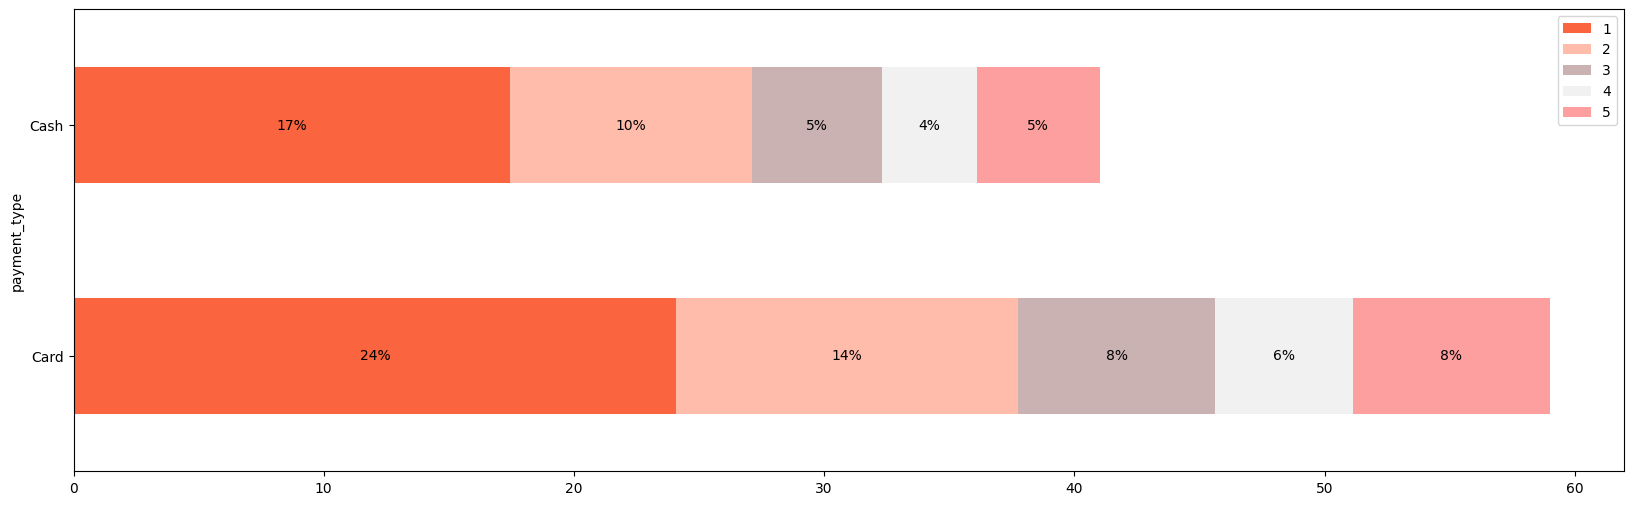

In [257]:
fig,ax = plt.subplots(figsize =(20,6))
df.plot(x= 'payment_type',kind = 'barh', stacked = True, ax= ax, color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])
# add percentage text
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x,y = p.get_xy()
  ax.text(x + width /2,
          y + height /2,
          '{:.0f}%'.format(width),
          horizontalalignment='center',
          verticalalignment='center')

**Null Hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative Hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash

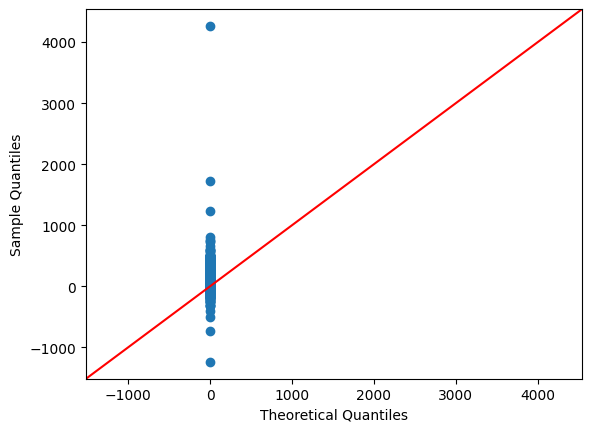

In [280]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [281]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']


In [282]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T statistics',t_stats, 'p-value',p_value)

T statistics nan p-value nan
